Jorge Castro DAPT NOV2021

# Activity 2.09
In this activity, we will be using the table district from the bank database and according to the description for the different columns:

## Create the connection between SQL and Python and extract all the information from the loan table where the status is either A or B.

In [99]:
from sqlalchemy import create_engine
import pandas as pd
import getpass



First I prepare my connection elements

In [100]:
DATABASE_LOCATION = 'mysql+pymysql://root:' + password + '@localhost/bank'
password = getpass.getpass()
query1 = """
SELECT * 
FROM loan a
WHERE a.status in ('A','B');
"""

········


In [101]:
query2 ="""
SELECT
  b.loan_id,
  c.a1 AS district_id,
  c.a11 AS average_salary,
  c.a13 AS district_jobless_rate,
  c.a16 AS distr_crimes_per_year 
FROM
  account a 
  INNER JOIN
    loan b 
    ON a.account_id = b.account_id 
  INNER JOIN
    district c 
    ON a.district_id = c.a1;
"""

In [102]:
query3 = """
SELECT district_id,
       loan_id,
       district.a2 AS district_name,
       sum(loan.amount) AS total_amount_borrowed,
       floor(avg(loan.amount)) AS average_loan,
       (case
            when status = 'A' then
                count(status)
            else
                0
        end
       ) as loans_status_A,
       (case
            when status = 'B' then
                count(status)
            else
                0
        end
       ) as loans_status_B
FROM loan
    INNER JOIN account
        ON loan.account_id = account.account_id
    INNER JOIN district
        ON account.district_id = district.a1
GROUP BY 1
ORDER BY 3 DESC;

"""

Creating engine and connecting to the MySQL database

In [103]:
engine = create_engine(DATABASE_LOCATION)
mydata = pd.read_sql_query(query1, engine)
mydata.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


## Use the executable class to run the query/queries. You can test the query/queries in SequelPro or Workbench and then use them with Python.

In [104]:
result = engine.execute(query1)

In [105]:
rows = [list(row) for row in result]
pd.DataFrame(rows)

,0,1,2,3,4,5,6
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A
...,...,...,...,...,...,...,...
229,5651,3329,971208,19248,12,1604.0,A
230,4962,25,971208,30276,12,2523.0,A
231,7199,10789,971209,45768,12,3814.0,A
232,6727,8505,971210,42840,12,3570.0,A


# Activity

## Pick any two queries from the queries that we have written so far and execute them in Python. The objective is to retrieve the data into a dataframe.

In [106]:
mydata2 = pd.read_sql_query(query2, engine)
mydata2.head()

,loan_id,district_id,average_salary,district_jobless_rate,distr_crimes_per_year
0,5314,30,9650,3.67,2804
1,5316,46,8369,2.31,2618
2,6863,45,8390,2.89,2122
3,5325,12,8754,4.31,3868
4,7240,1,12541,0.43,99107


In [107]:
mydata3 = pd.read_sql_query(query3, engine)
mydata3.head()

,district_id,loan_id,district_name,total_amount_borrowed,average_loan,loans_status_A,loans_status_B
0,65,5161,Znojmo,944376.0,157396,6,0
1,64,6456,Zlin,3012768.0,177221,17,0
2,66,5002,Zdar nad Sazavou,1326540.0,189505,7,0
3,63,5523,Vyskov,777192.0,111027,7,0
4,77,6696,Vsetin,490980.0,81830,0,0


# Activity
Analyze transformed data

 * How many new columns have been created?

In [108]:
mydata.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [109]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
sns.set_theme(style="whitegrid")

In [110]:
mydata.shape

(234, 7)

In [111]:
mydata.dtypes

loan_id         int64
account_id      int64
date            int64
amount          int64
duration        int64
payments      float64
status         object
dtype: object

In [112]:
categoricals = pd.DataFrame(mydata.select_dtypes(include='object'))
numerical = pd.DataFrame(mydata._get_numeric_data())

In [113]:
mydata.describe()

,loan_id,account_id,date,amount,duration,payments
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,6233.803419,6118.017094,950554.256410,98143.435897,22.666667,4414.119658
std,680.590147,3274.312851,12597.668716,72013.383242,11.847384,2230.195977
min,4959.000000,2.000000,930705.000000,4980.000000,12.000000,319.000000
25%,5684.750000,3463.500000,940705.750000,45039.000000,12.000000,2583.750000
50%,6300.000000,6381.500000,950315.000000,80646.000000,24.000000,4099.500000
75%,6756.750000,8728.500000,960888.750000,126960.000000,24.000000,6337.500000
max,7308.000000,11362.000000,971228.000000,464520.000000,60.000000,9736.000000


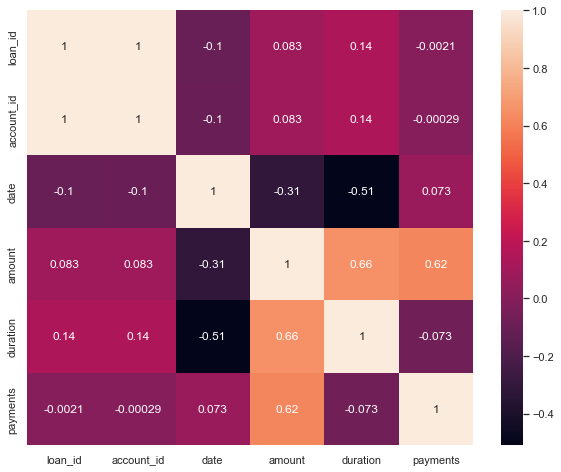

In [114]:
# Numerical column, multicolinearity check

corr_matrix=numerical.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

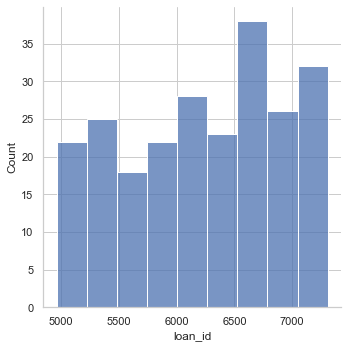

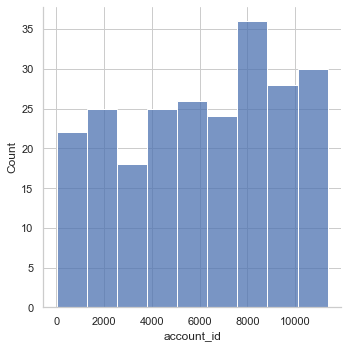

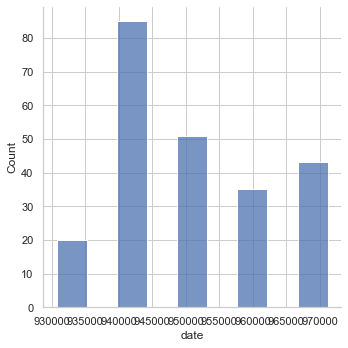

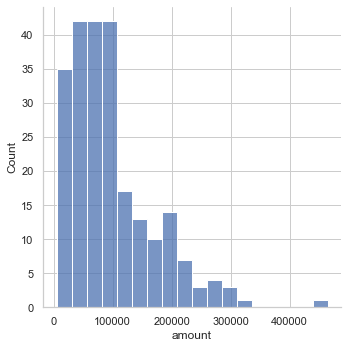

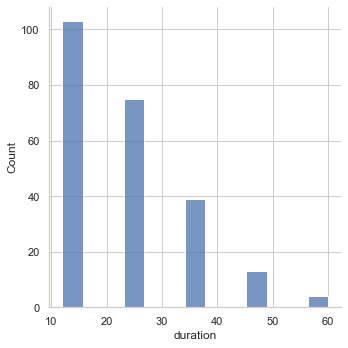

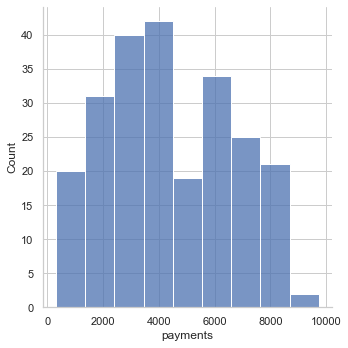

In [115]:
# Distributions for numericals

for i in numerical.columns:
    sb.displot(numerical[i])

In [116]:
# Transforming numerical columns with the Normalizer

from sklearn.preprocessing import Normalizer

x = mydata.select_dtypes(include = np.number)

x1 = x.copy()

In [117]:
# Normalising the data

transformer = Normalizer().fit(x1)
x_normalized = transformer.transform(x1)
x_normalized = pd.DataFrame(x_normalized)

In [118]:
x_normalized.head()

,0,1,2,3,4,5
0,0.005679,0.001910,0.994625,0.103016,0.000013,0.008585
1,0.005623,0.001905,0.984442,0.175541,0.000038,0.004876
2,0.007305,0.009780,0.990731,0.135273,0.000064,0.002255
3,0.005684,0.001967,0.993579,0.112940,0.000038,0.003137
4,0.007459,0.011345,0.959003,0.283032,0.000062,0.004717


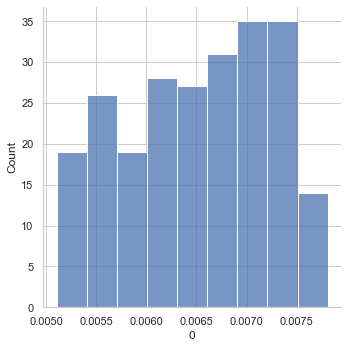

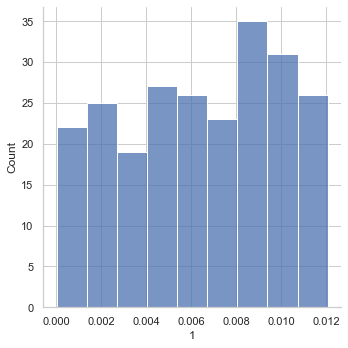

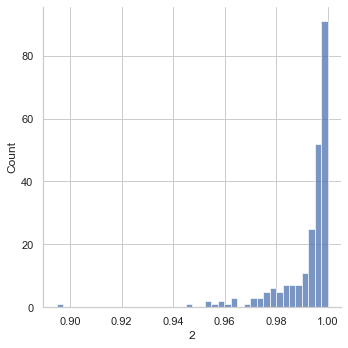

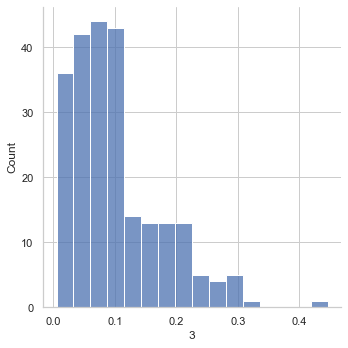

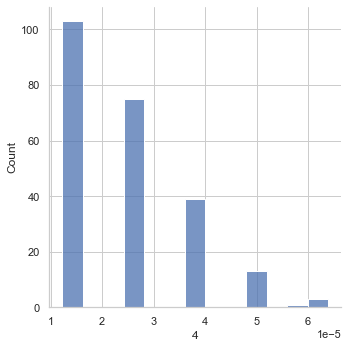

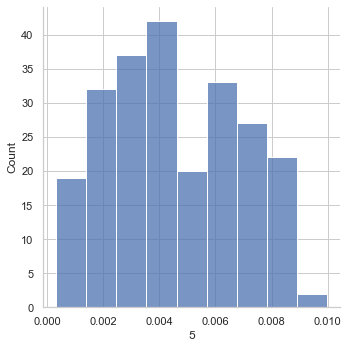

In [119]:
for i in x_normalized.columns:
    sb.displot(x_normalized[i])

# Activity
* Understand the confusion matrix. Discuss the type 1 and 2 errors. Which one are we making? Which one is worse in our scenario?

Try normalize : {'true', 'pred', 'all'}, default=None. Normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population.